# Water Quality Detection

## Import Dataset and Explore Data

In [1]:
import numpy as np
import pandas as pd

In [2]:
df = pd.read_csv('water_potability.csv')

In [3]:
df.head()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,NaN,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.057858,6.635246,NaN,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.541732,9.275884,NaN,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3276 entries, 0 to 3275
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ph               2785 non-null   float64
 1   Hardness         3276 non-null   float64
 2   Solids           3276 non-null   float64
 3   Chloramines      3276 non-null   float64
 4   Sulfate          2495 non-null   float64
 5   Conductivity     3276 non-null   float64
 6   Organic_carbon   3276 non-null   float64
 7   Trihalomethanes  3114 non-null   float64
 8   Turbidity        3276 non-null   float64
 9   Potability       3276 non-null   int64  
dtypes: float64(9), int64(1)
memory usage: 256.1 KB


## Feature Engineering


In [5]:
df['ph_null']

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
count,2785.000000,3276.000000,3276.000000,3276.000000,2495.000000,3276.000000,3276.000000,3114.000000,3276.000000,3276.000000
mean,7.080795,196.369496,22014.092526,7.122277,333.775777,426.205111,14.284970,66.396293,3.966786,0.390110
std,1.594320,32.879761,8768.570828,1.583085,41.416840,80.824064,3.308162,16.175008,0.780382,0.487849
min,0.000000,47.432000,320.942611,0.352000,129.000000,181.483754,2.200000,0.738000,1.450000,0.000000
25%,6.093092,176.850538,15666.690297,6.127421,307.699498,365.734414,12.065801,55.844536,3.439711,0.000000
50%,7.036752,196.967627,20927.833607,7.130299,333.073546,421.884968,14.218338,66.622485,3.955028,0.000000
75%,8.062066,216.667456,27332.762127,8.114887,359.950170,481.792304,16.557652,77.337473,4.500320,1.000000
max,14.000000,323.124000,61227.196008,13.127000,481.030642,753.342620,28.300000,124.000000,6.739000,1.000000


In [8]:
df.isnull().sum()

ph                 491
Hardness             0
Solids               0
Chloramines          0
Sulfate            781
Conductivity         0
Organic_carbon       0
Trihalomethanes    162
Turbidity            0
Potability           0
dtype: int64

In [9]:
df[df['ph'].isnull()]

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,NaN,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
8,NaN,118.988579,14285.583854,7.804174,268.646941,389.375566,12.706049,53.928846,3.595017,0
13,NaN,150.174923,27331.361962,6.838223,299.415781,379.761835,19.370807,76.509996,4.413974,0
20,NaN,227.435048,22305.567414,10.333918,NaN,554.820086,16.331693,45.382815,4.133423,0
22,NaN,215.977859,17107.224226,5.607060,326.943978,436.256194,14.189062,59.855476,5.459251,0
...,...,...,...,...,...,...,...,...,...,...
3224,NaN,198.218700,31081.735264,7.419106,NaN,517.925946,11.711419,85.428785,3.345543,1
3229,NaN,203.204659,10643.186771,6.828936,NaN,384.597711,16.011328,72.911573,3.065910,1
3231,NaN,225.754109,28194.452646,5.892830,366.201583,418.272901,17.306832,103.912548,3.855895,1
3245,NaN,188.536608,24711.414927,7.129520,NaN,555.548534,16.959269,56.038702,4.331691,1


In [47]:
import numpy as np
df['pH_null'] = np.where(df['ph'].isnull(), 1, 0) # if null, replace 1 or 0
df['sulfate_null'] = np.where(df['Sulfate'].isnull(), 1, 0)
df['tri_null'] = np.where(df['Trihalomethanes'].isnull(), 1, 0)
# find percentage of null values
df['ph'].fillna(df['ph'].median(), inplace=True)
df['Sulfate'].fillna(df['Sulfate'].median(), inplace=True)
df['Trihalomethanes'].fillna(df['Trihalomethanes'].median(), inplace=True)

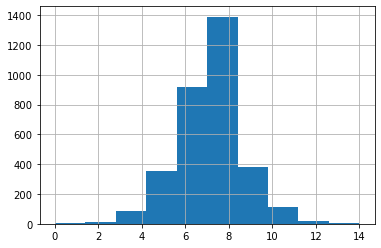

In [48]:
df['ph'].hist()

## Hyperparameter Tuning

In [49]:
from tensorflow.keras import layers
from tensorflow import keras
from keras_tuner.tuners import RandomSearch

In [57]:
def build_model(hp):
    model = keras.Sequential()
    for i in range(hp.Int('num_layers', 2, 20)):
        model.add(layers.Dense(units=hp.Int('units_' + str(i),
                         min_value=32,
                         max_value=512,
                         step=50),
                  activation='relu'))
    model.add(layers.Dense(1, activation='sigmoid'))
    model.compile(
        optimizer=keras.optimizers.Adam(
        hp.Choice('learning_rate', [1e-2, 1e-3, 1e-4])),
        loss='binary_crossentropy',
        metrics=['accuracy'])
    return model

In [58]:
tuner = RandomSearch(
    build_model,
    objective='val_accuracy',
    max_trials=5,
    executions_per_trial=3,
    directory='project2',
    project_name='Simple Tuning')

INFO:tensorflow:Reloading Oracle from existing project project2\Simple Tuning\oracle.json
INFO:tensorflow:Reloading Tuner from project2\Simple Tuning\tuner0.json


In [59]:
tuner.search_space_summary()

Search space summary
Default search space size: 17
num_layers (Int)
{'default': None, 'conditions': [], 'min_value': 2, 'max_value': 20, 'step': 1, 'sampling': None}
units_0 (Int)
{'default': None, 'conditions': [], 'min_value': 32, 'max_value': 512, 'step': 50, 'sampling': None}
units_1 (Int)
{'default': None, 'conditions': [], 'min_value': 32, 'max_value': 512, 'step': 50, 'sampling': None}
learning_rate (Choice)
{'default': 0.01, 'conditions': [], 'values': [0.01, 0.001, 0.0001], 'ordered': True}
units_2 (Int)
{'default': None, 'conditions': [], 'min_value': 32, 'max_value': 512, 'step': 50, 'sampling': None}
units_3 (Int)
{'default': None, 'conditions': [], 'min_value': 32, 'max_value': 512, 'step': 50, 'sampling': None}
units_4 (Int)
{'default': None, 'conditions': [], 'min_value': 32, 'max_value': 512, 'step': 50, 'sampling': None}
units_5 (Int)
{'default': None, 'conditions': [], 'min_value': 32, 'max_value': 512, 'step': 50, 'sampling': None}
units_6 (Int)
{'default': None, 'co

In [60]:
from sklearn.model_selection import train_test_split
X = df.iloc[:, :-1]
y = df.iloc[:,-1]
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=42)


In [61]:
tuner.search(X_train, y_train, epochs=5,validation_data=(X_test, y_test))

INFO:tensorflow:Oracle triggered exit


In [62]:
tuner.results_summary()

Results summary
Results in project2\Simple Tuning
Showing 10 best trials
Objective(name='val_accuracy', direction='max')
Trial summary
Hyperparameters:
num_layers: 12
units_0: 482
units_1: 82
learning_rate: 0.001
units_2: 82
units_3: 382
units_4: 132
units_5: 332
units_6: 182
units_7: 232
units_8: 482
units_9: 232
units_10: 432
units_11: 132
units_12: 332
units_13: 482
units_14: 382
Score: 0.950152575969696
Trial summary
Hyperparameters:
num_layers: 15
units_0: 332
units_1: 82
learning_rate: 0.0001
units_2: 432
units_3: 232
units_4: 182
units_5: 32
units_6: 32
units_7: 32
units_8: 32
units_9: 32
units_10: 32
units_11: 32
units_12: 32
units_13: 32
units_14: 32
Score: 0.950152575969696
Trial summary
Hyperparameters:
num_layers: 8
units_0: 332
units_1: 332
learning_rate: 0.0001
units_2: 382
units_3: 182
units_4: 382
units_5: 282
units_6: 332
units_7: 132
units_8: 482
units_9: 332
units_10: 332
units_11: 382
units_12: 432
units_13: 82
units_14: 132
Score: 0.950152575969696
Trial summary
Hy

## Model Building

In [67]:
model = keras.Sequential()
model.add(layers.Dense(332, activation='relu'))
model.add(layers.Dense(332, activation='relu'))
model.add(layers.Dense(382, activation='relu'))
model.add(layers.Dense(182, activation='relu'))
model.add(layers.Dense(382, activation='relu'))
model.add(layers.Dense(282, activation='relu'))
model.add(layers.Dense(332, activation='relu'))
model.add(layers.Dense(132, activation='relu'))
model.add(layers.Dense(482, activation='relu'))
model.add(layers.Dense(332, activation='relu'))
model.add(layers.Dense(332, activation='relu'))
model.add(layers.Dense(382, activation='relu'))
model.add(layers.Dense(432, activation='relu'))
model.add(layers.Dense(82, activation='relu'))
model.add(layers.Dense(132, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))
model.compile(keras.optimizers.Adam(learning_rate=1e-4), keras.losses.BinaryCrossentropy(), metrics=['accuracy'])

In [68]:
model.fit(X_train, y_train, epochs=250)

Epoch 1/250

If you intended to run this layer in float32, you can safely ignore this warning. If in doubt, this warning is likely only an issue if you are porting a TensorFlow 1.X model to TensorFlow 2.

To change all layers to have dtype float64 by default, call `tf.keras.backend.set_floatx('float64')`. To change just this layer, pass dtype='float64' to the layer constructor. If you are the author of this layer, you can disable autocasting by passing autocast=False to the base Layer constructor.

72/72 [==============================] - 1s 9ms/step - loss: 0.4252 - accuracy: 0.9285
Epoch 2/250
72/72 [==============================] - 1s 8ms/step - loss: 0.2610 - accuracy: 0.9507
Epoch 3/250
72/72 [==============================] - 1s 9ms/step - loss: 0.2516 - accuracy: 0.9507: 0s - loss: 0.252
Epoch 4/250
72/72 [==============================] - 1s 9ms/step - loss: 0.2331 - accuracy: 0.9507
Epoch 5/250
72/72 [==============================] - 1s 14ms/step - loss: 0.2380 - accuracy: 0

72/72 [==============================] - 1s 17ms/step - loss: 0.2055 - accuracy: 0.9507
Epoch 75/250
72/72 [==============================] - 1s 11ms/step - loss: 0.2010 - accuracy: 0.9507
Epoch 76/250
72/72 [==============================] - 1s 13ms/step - loss: 0.2054 - accuracy: 0.9507
Epoch 77/250
72/72 [==============================] - 1s 10ms/step - loss: 0.2059 - accuracy: 0.9507
Epoch 78/250
72/72 [==============================] - 1s 12ms/step - loss: 0.2033 - accuracy: 0.9507
Epoch 79/250
72/72 [==============================] - 1s 12ms/step - loss: 0.1997 - accuracy: 0.9507
Epoch 80/250
72/72 [==============================] - 1s 12ms/step - loss: 0.2020 - accuracy: 0.9507
Epoch 81/250
72/72 [==============================] - 1s 11ms/step - loss: 0.2023 - accuracy: 0.9507
Epoch 82/250
72/72 [==============================] - 1s 11ms/step - loss: 0.2011 - accuracy: 0.9507
Epoch 83/250
72/72 [==============================] - 1s 10ms/step - loss: 0.2030 - accuracy: 0.9507
Epo

72/72 [==============================] - 1s 10ms/step - loss: 0.1999 - accuracy: 0.9507
Epoch 155/250
72/72 [==============================] - 1s 10ms/step - loss: 0.2018 - accuracy: 0.9507
Epoch 156/250
72/72 [==============================] - 1s 10ms/step - loss: 0.1967 - accuracy: 0.9507
Epoch 157/250
72/72 [==============================] - 1s 15ms/step - loss: 0.1995 - accuracy: 0.9507
Epoch 158/250
72/72 [==============================] - 1s 9ms/step - loss: 0.1978 - accuracy: 0.9507
Epoch 159/250
72/72 [==============================] - 1s 11ms/step - loss: 0.1987 - accuracy: 0.9507
Epoch 160/250
72/72 [==============================] - 1s 10ms/step - loss: 0.1941 - accuracy: 0.9507
Epoch 161/250
72/72 [==============================] - 1s 10ms/step - loss: 0.1988 - accuracy: 0.9507
Epoch 162/250
72/72 [==============================] - 1s 10ms/step - loss: 0.1969 - accuracy: 0.9507
Epoch 163/250
72/72 [==============================] - 1s 10ms/step - loss: 0.1974 - accuracy: 0.

72/72 [==============================] - 1s 11ms/step - loss: 0.1972 - accuracy: 0.9507
Epoch 234/250
72/72 [==============================] - 1s 10ms/step - loss: 0.1955 - accuracy: 0.9507
Epoch 235/250
72/72 [==============================] - 1s 15ms/step - loss: 0.1961 - accuracy: 0.9507
Epoch 236/250
72/72 [==============================] - 1s 10ms/step - loss: 0.1968 - accuracy: 0.9507
Epoch 237/250
72/72 [==============================] - 1s 10ms/step - loss: 0.1961 - accuracy: 0.9507
Epoch 238/250
72/72 [==============================] - 1s 12ms/step - loss: 0.1954 - accuracy: 0.9507 0s - loss: 0.1818 
Epoch 239/250
72/72 [==============================] - 1s 10ms/step - loss: 0.1958 - accuracy: 0.9507
Epoch 240/250
72/72 [==============================] - 1s 10ms/step - loss: 0.1952 - accuracy: 0.9507
Epoch 241/250
72/72 [==============================] - 1s 10ms/step - loss: 0.1973 - accuracy: 0.9507
Epoch 242/250
72/72 [==============================] - 1s 14ms/step - loss: 0

## Model Evaluation

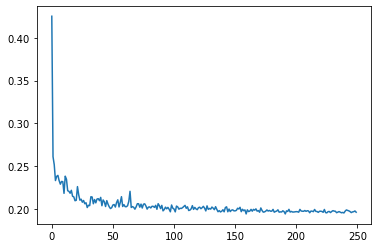

In [71]:
df = pd.DataFrame(model.history.history)
df['loss'].plot()

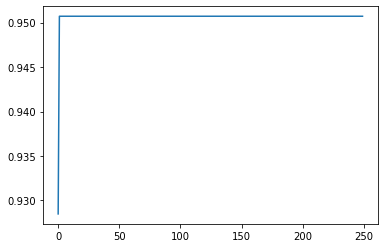

In [72]:
df['accuracy'].plot()

In [73]:
test_predictions = model.evaluate(X_test)

31/31 [==============================] - 0s 613us/step - loss: 0.0000e+00 - accuracy: 0.0000e+00


In [75]:
test_predictions = model.predict(X_test)
train_predictions = model.predict(X_train)

In [81]:
eval_df = pd.DataFrame(test_predictions, columns=['Predicted'])
eval_df['Actual'] = y_test.values
eval_df.head(50)

,Predicted,Actual
0,4.788551e-02,0
1,6.479597e-02,0
2,5.210483e-02,0
3,4.805672e-02,0
4,4.775569e-02,0
5,4.471517e-02,1
6,4.563916e-02,1
7,6.425753e-02,0
8,4.138180e-14,0
9,6.305256e-02,0
